<a href="https://colab.research.google.com/github/jithendranaidupothala/datascienceproject-23030594/blob/main/datascienceproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_csv('/content/drive/MyDrive/Agriculture_Crop(rice)_yield_.dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15104 entries, 0 to 15103
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State_Name         15104 non-null  object 
 1   District_Name      15104 non-null  object 
 2   Crop_Year          15104 non-null  int64  
 3   Season             15104 non-null  object 
 4   Crop               15104 non-null  object 
 5   Area               15104 non-null  float64
 6   Production         15082 non-null  float64
 7   Annual_Rainfall    15104 non-null  float64
 8   fertilizers        15104 non-null  float64
 9   pesticides_tonnes  15104 non-null  float64
 10  Yield              15082 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.3+ MB


In [6]:
#find null values
df.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,22
Annual_Rainfall,0
fertilizers,0
pesticides_tonnes,0


In [7]:
df['Production'].fillna(df['Production'].mean(), inplace=True)
df['Yield'].fillna(df['Yield'].median(), inplace=True)

<ipython-input-7-f24897ef641a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Production'].fillna(df['Production'].mean(), inplace=True)
<ipython-input-7-f24897ef641a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [8]:
df_filled = df.copy()
# if inplace=false then it applicable

In [9]:
df.isna().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,0
Annual_Rainfall,0
fertilizers,0
pesticides_tonnes,0


In [10]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Annual_Rainfall,fertilizers,pesticides_tonnes,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,2030.157179,100.0,1.0,3.147059
1,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,2922.849432,100.0,1.0,3.614458
2,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,2123.467224,100.0,1.0,2.700000
3,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,2292.704167,100.0,1.0,1.734038
4,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,2762.063169,100.0,1.0,1.370797


Text(0.5, 1.0, 'Season vs Production')

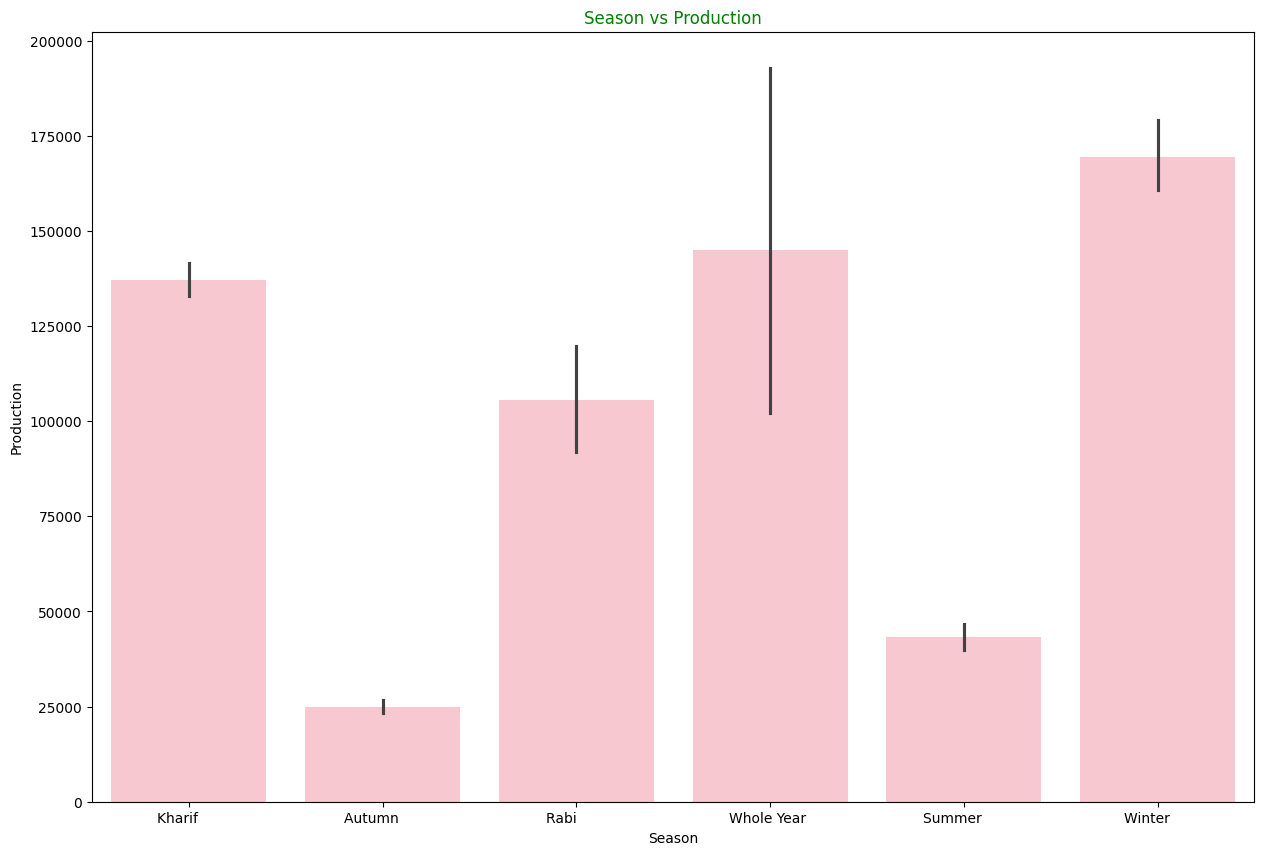

In [11]:
x=df['Season']
y=df['Production']
plt.figure(figsize=(15, 10))
sns.barplot(x=x,y=y,color='pink')
plt.title('Season vs Production',color='green')

<Axes: xlabel='Yield', ylabel='State_Name'>

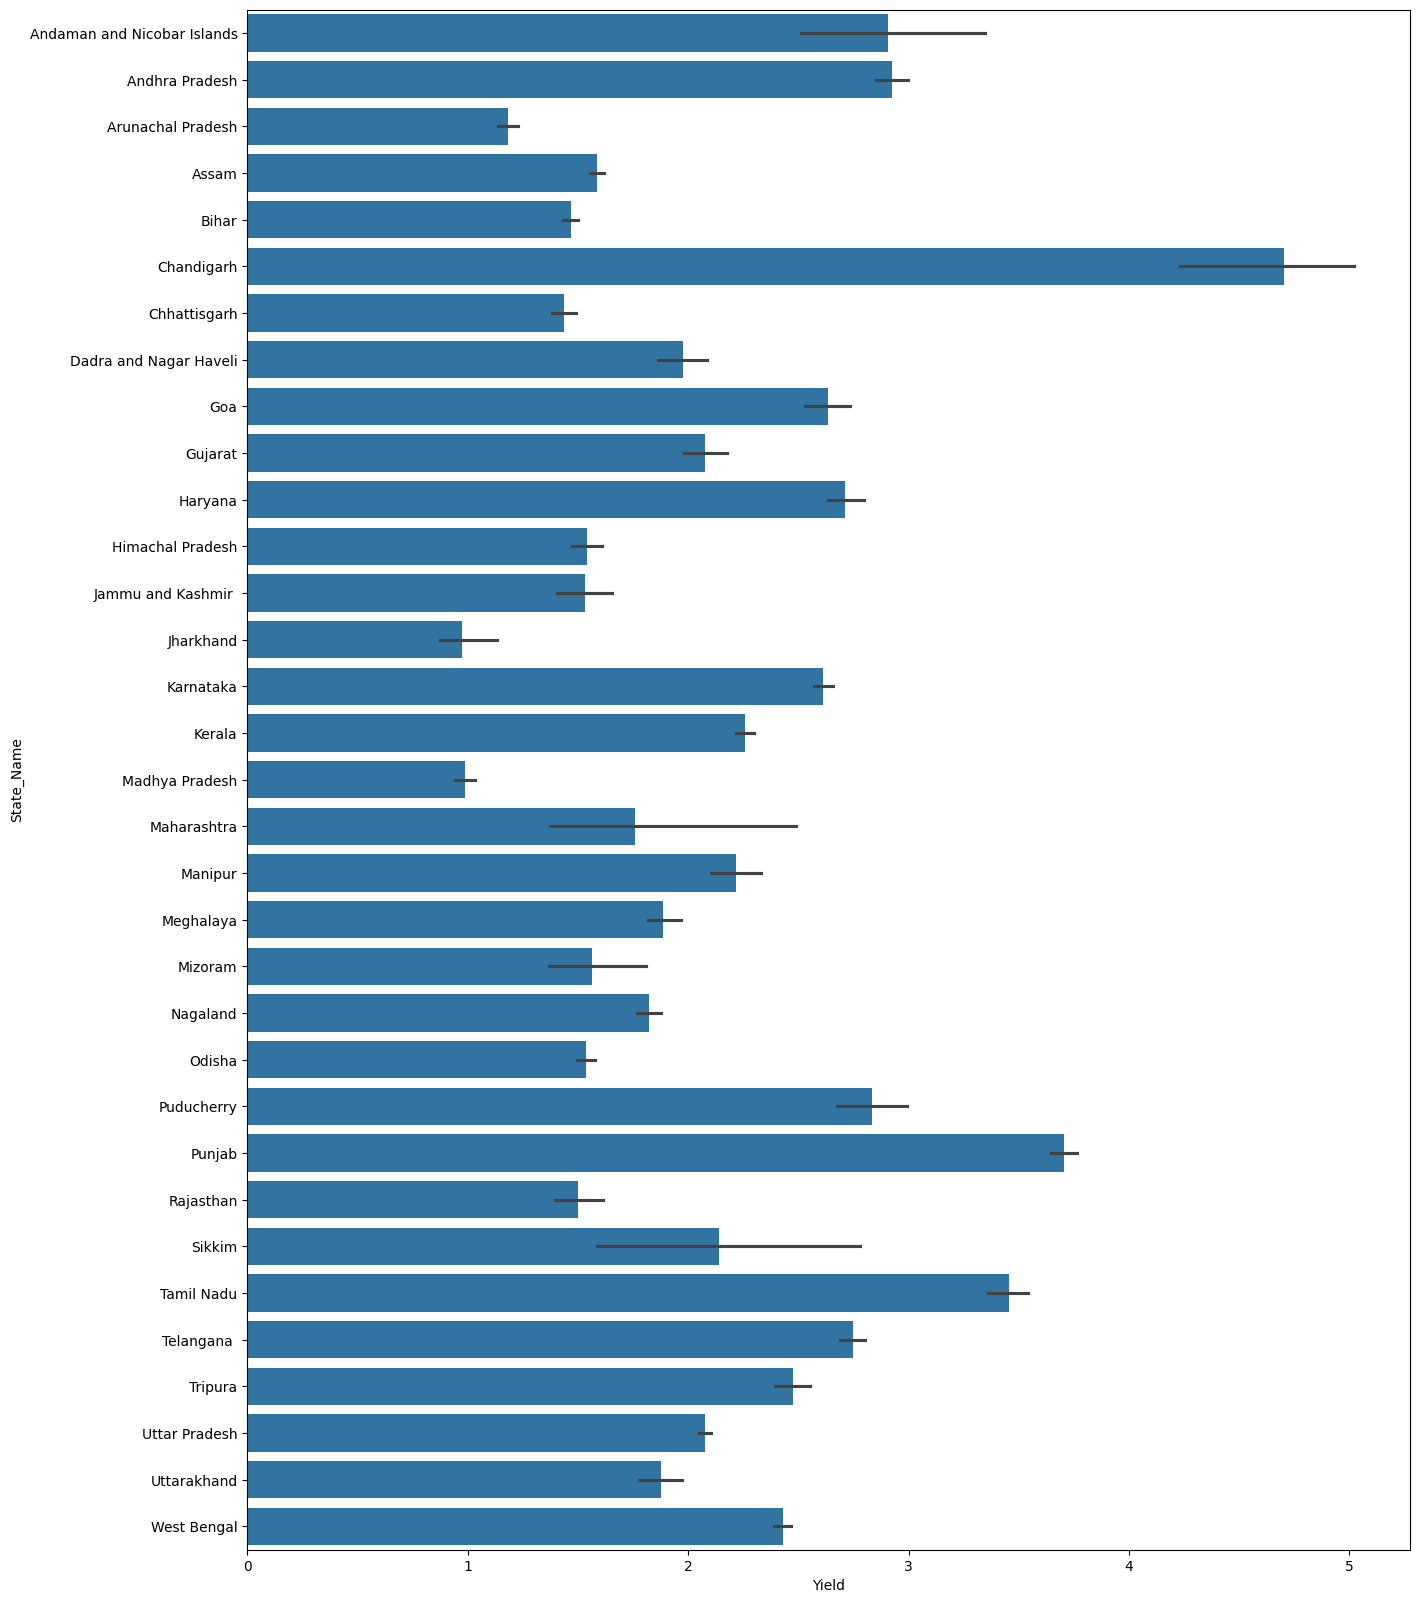

In [12]:
plt.figure(figsize=(15, 20))
x=df['Yield']
y=df['State_Name']
sns.barplot(y=y, x=x)

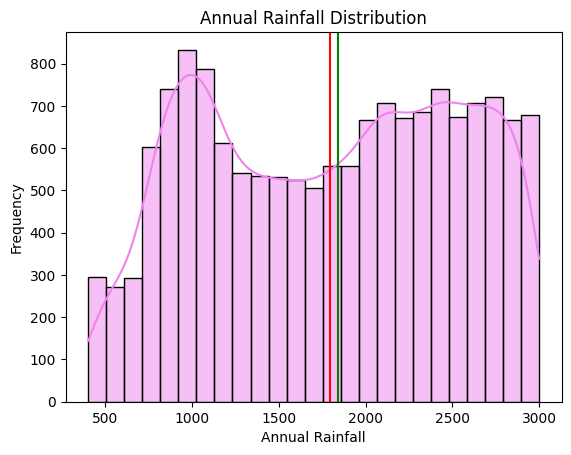

In [13]:
sns.histplot(df['Annual_Rainfall'],kde=True,color='violet')
plt.title('Annual Rainfall Distribution')
plt.xlabel('Annual Rainfall')
plt.ylabel('Frequency')
plt.axvline(df['Annual_Rainfall'].mean(), color='red', label='Mean')
plt.axvline(df['Annual_Rainfall'].median(), color='green', label='Median')


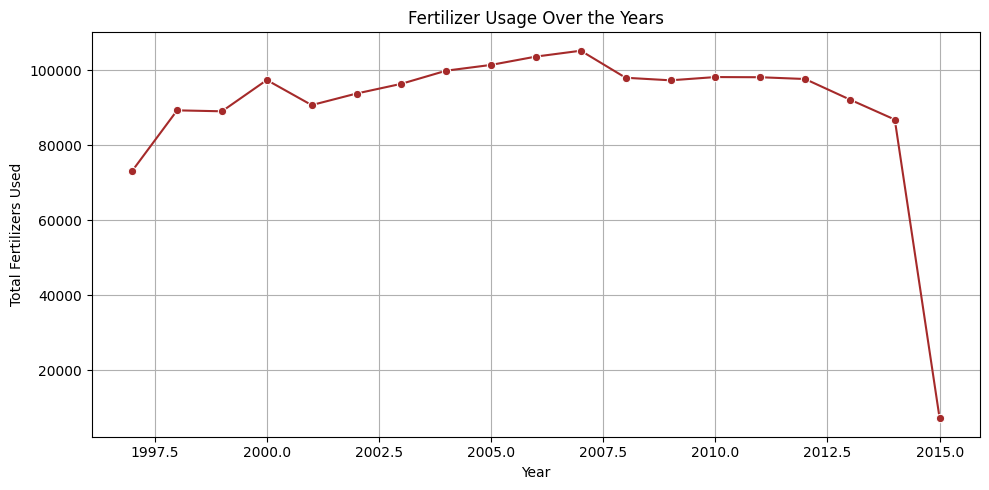

In [14]:
# Fertilizer usage per year
fert_year = df.groupby('Crop_Year')['fertilizers'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=fert_year, x='Crop_Year', y='fertilizers', marker='o', color='brown')
plt.title('Fertilizer Usage Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Fertilizers Used')
plt.grid(True)
plt.tight_layout()
plt.show()

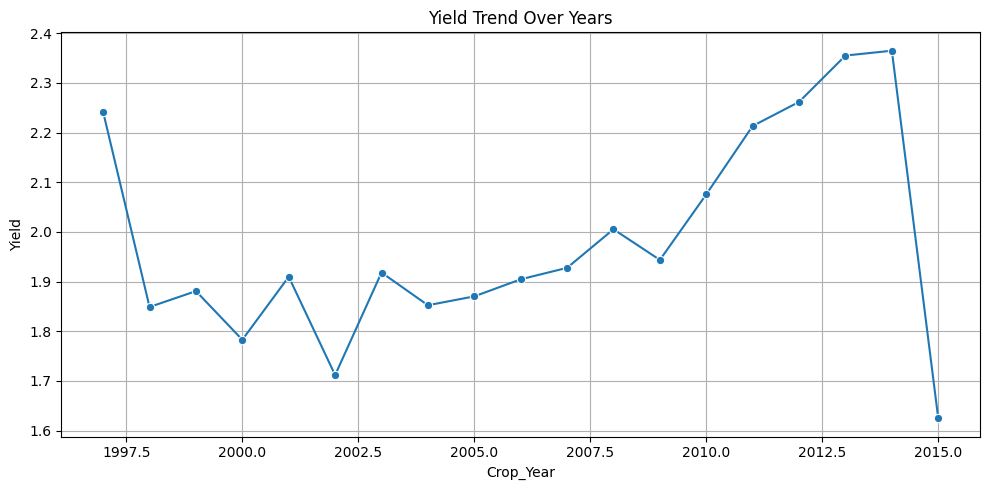

In [16]:
plt.figure(figsize=(10, 5))
yearly_yield = df.groupby('Crop_Year')['Yield'].mean().reset_index()
sns.lineplot(data=yearly_yield, x='Crop_Year', y='Yield', marker='o')
plt.title('Yield Trend Over Years')
plt.grid(True)
plt.tight_layout()
plt.show()

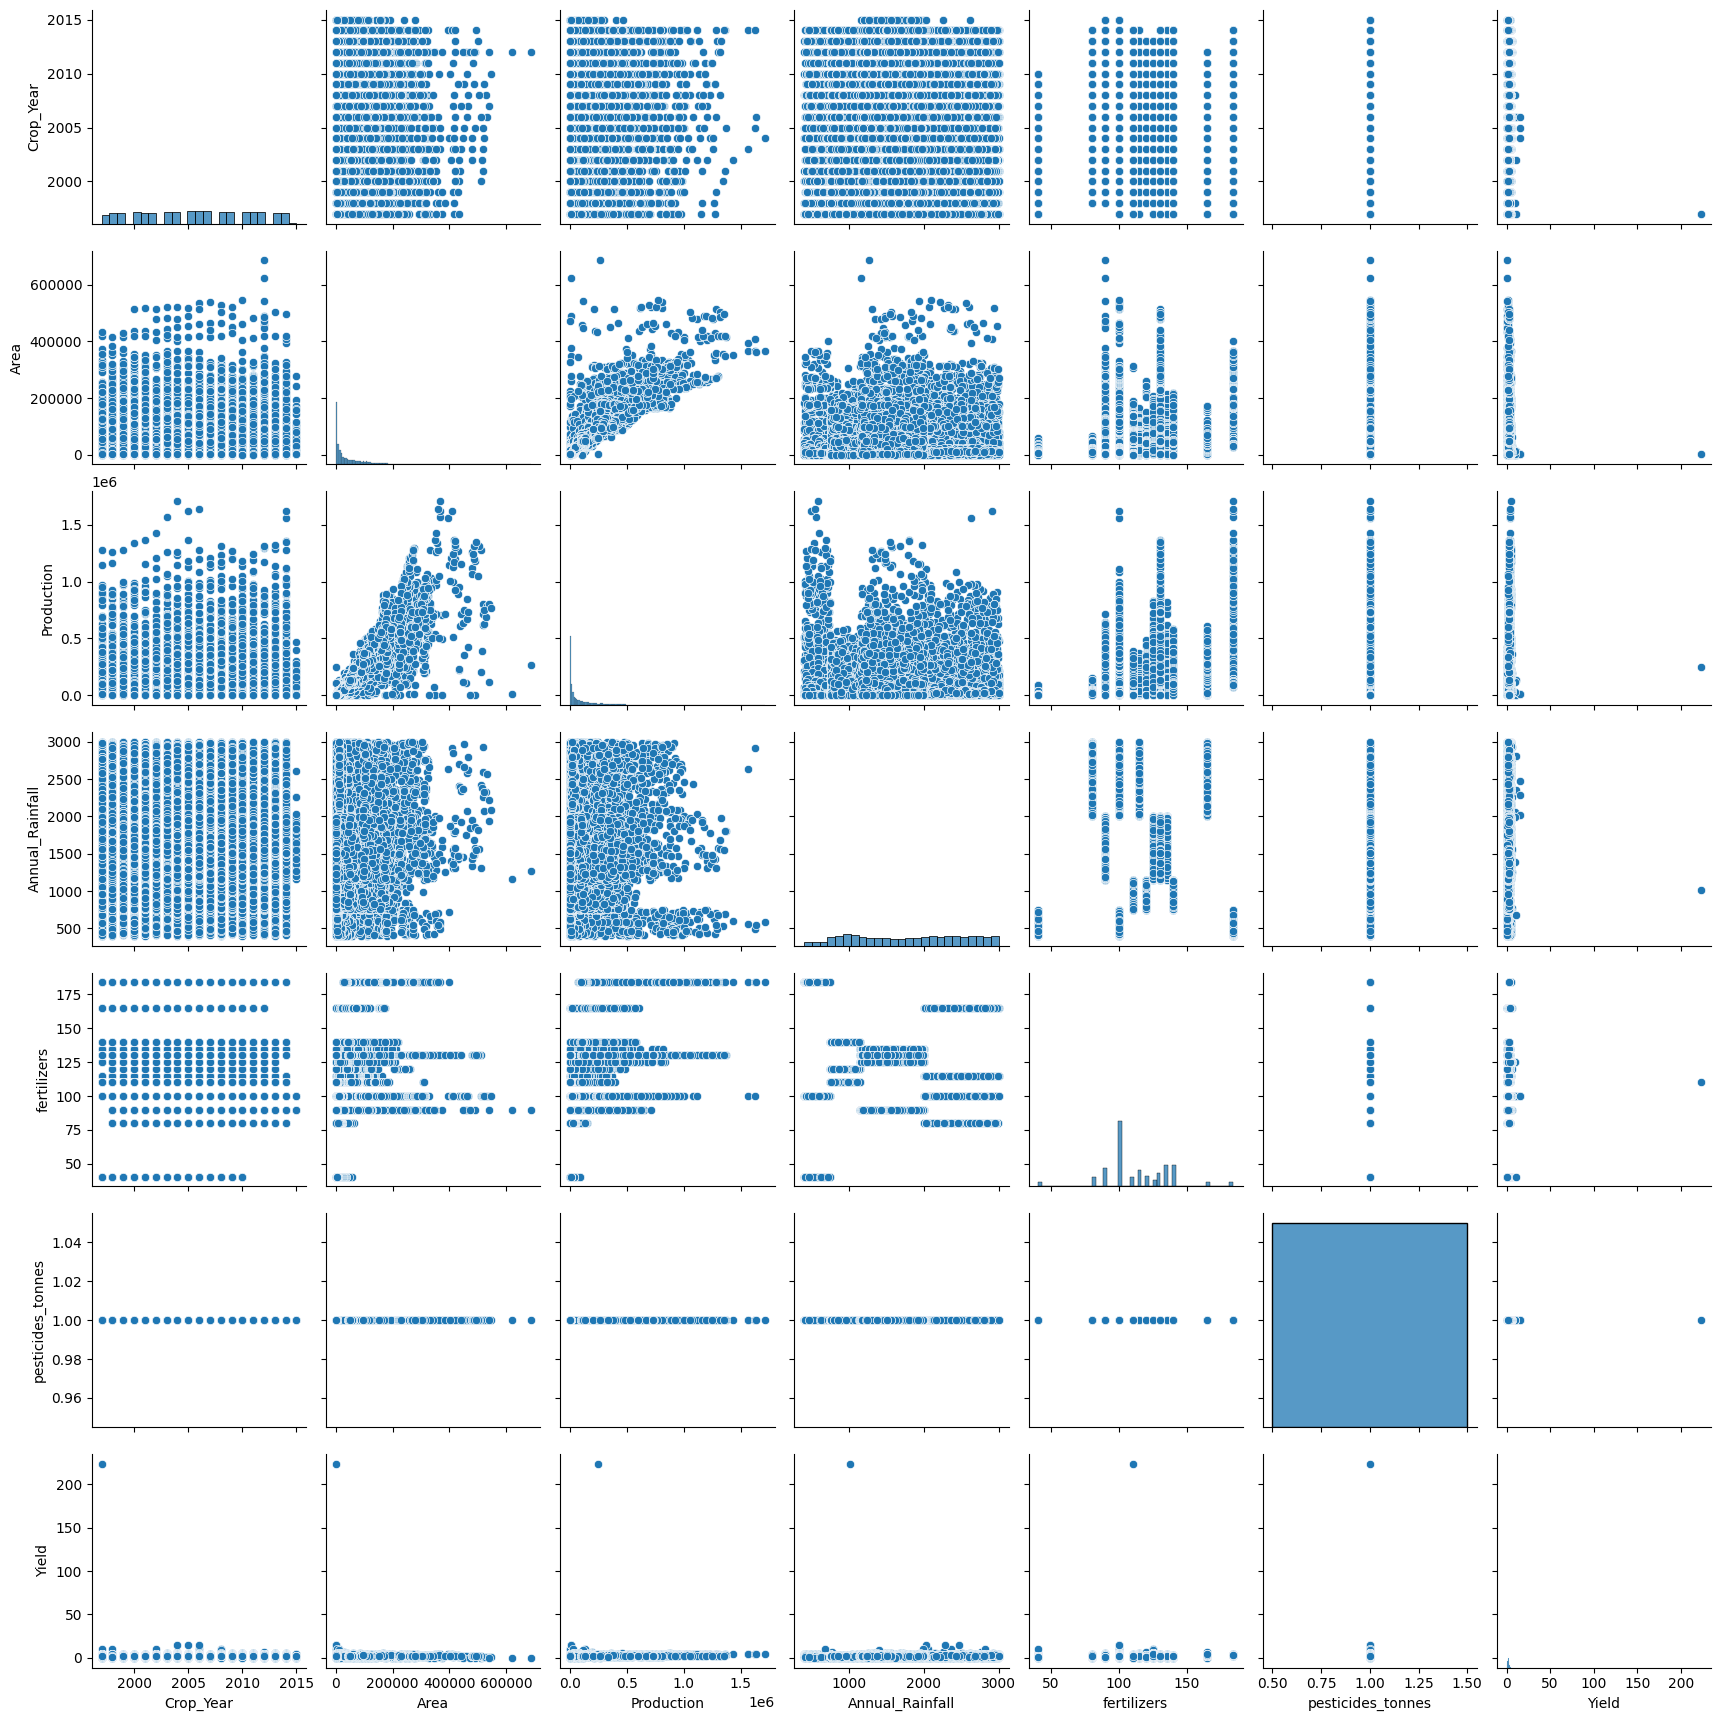

In [17]:
sns.pairplot(df)

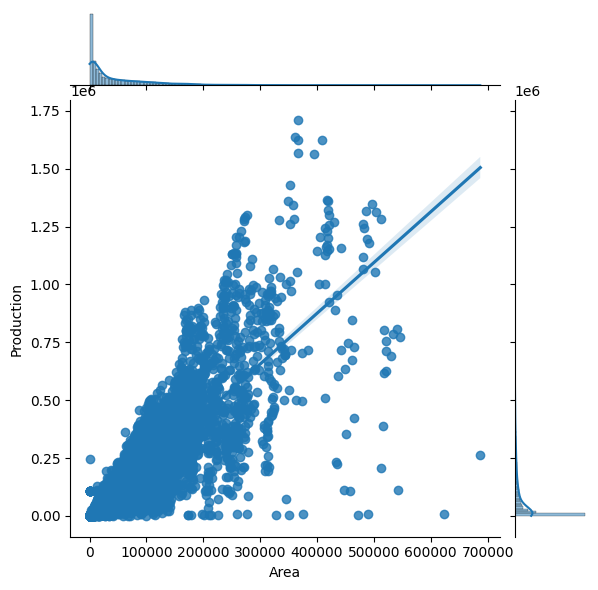

In [18]:
# Joint plot between 'Production' and 'Area'
sns.jointplot(x='Area', y='Production', data=df, kind='reg')  # 'reg' for regression line
plt.show()

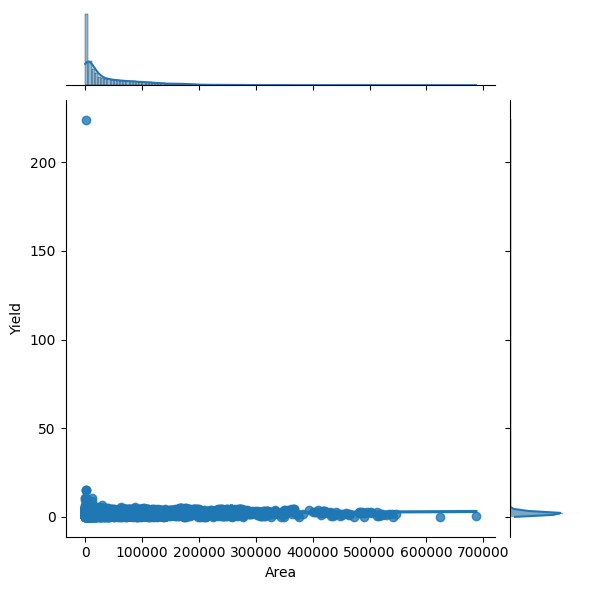

In [19]:
# Joint plot between 'Production' and 'Area'
sns.jointplot(x='Area', y='Yield', data=df, kind='reg')  # 'reg' for regression line
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15104 entries, 0 to 15103
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State_Name         15104 non-null  object 
 1   District_Name      15104 non-null  object 
 2   Crop_Year          15104 non-null  int64  
 3   Season             15104 non-null  object 
 4   Crop               15104 non-null  object 
 5   Area               15104 non-null  float64
 6   Production         15104 non-null  float64
 7   Annual_Rainfall    15104 non-null  float64
 8   fertilizers        15104 non-null  float64
 9   pesticides_tonnes  15104 non-null  float64
 10  Yield              15104 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.3+ MB


In [21]:
df.select_dtypes(include=['object']).columns

Index(['State_Name', 'District_Name', 'Season', 'Crop'], dtype='object')

In [22]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'fertilizers',
       'pesticides_tonnes', 'Yield'],
      dtype='object')

In [23]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,fertilizers,pesticides_tonnes,Yield
count,15104.000000,15104.000000,1.510400e+04,15104.000000,15104.000000,15104.0,15104.000000
mean,2005.704913,49465.392035,1.064494e+05,1795.779313,113.548795,1.0,1.994932
std,5.053981,68790.684812,1.738190e+05,726.592763,24.037567,0.0,2.047196
min,1997.000000,1.000000,0.000000e+00,400.334325,40.500000,1.0,0.000000
25%,2001.000000,3298.750000,5.000000e+03,1121.391446,100.000000,1.0,1.276029
50%,2006.000000,18888.000000,3.067961e+04,1842.875335,110.000000,1.0,1.938529
75%,2010.000000,72741.750000,1.350475e+05,2436.108084,135.000000,1.0,2.563403
max,2015.000000,687000.000000,1.710000e+06,2999.839937,184.000000,1.0,223.727273


In [24]:
mean=np.mean(df['Crop_Year'])
print(mean)

2005.7049126059321


In [25]:
standard_deviation=np.std(df['Crop_Year'])
print(standard_deviation)

5.053813924981472


pre-processing the datset

> using label_encoder





In [26]:
from sklearn.preprocessing import LabelEncoder

# Select object-type columns for encoding
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for possible inverse transformation

# Display the transformed dataset's first few rows
df.head()


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Annual_Rainfall,fertilizers,pesticides_tonnes,Yield
0,0,412,2000,1,0,102.00,321.00,2030.157179,100.0,1.0,3.147059
1,0,412,2001,1,0,83.00,300.00,2922.849432,100.0,1.0,3.614458
2,0,412,2002,1,0,189.20,510.84,2123.467224,100.0,1.0,2.700000
3,0,412,2003,1,0,52.00,90.17,2292.704167,100.0,1.0,1.734038
4,0,412,2004,1,0,52.94,72.57,2762.063169,100.0,1.0,1.370797


In [27]:
# Create a dictionary of mappings for all encoded categorical columns
encoded_mappings = {col: dict(enumerate(label_encoders[col].classes_)) for col in label_encoders}

# Display the mappings
encoded_mappings


{'State_Name': {0: 'Andaman and Nicobar Islands',
  1: 'Andhra Pradesh',
  2: 'Arunachal Pradesh',
  3: 'Assam',
  4: 'Bihar',
  5: 'Chandigarh',
  6: 'Chhattisgarh',
  7: 'Dadra and Nagar Haveli',
  8: 'Goa',
  9: 'Gujarat',
  10: 'Haryana',
  11: 'Himachal Pradesh',
  12: 'Jammu and Kashmir ',
  13: 'Jharkhand',
  14: 'Karnataka',
  15: 'Kerala',
  16: 'Madhya Pradesh',
  17: 'Maharashtra',
  18: 'Manipur',
  19: 'Meghalaya',
  20: 'Mizoram',
  21: 'Nagaland',
  22: 'Odisha',
  23: 'Puducherry',
  24: 'Punjab',
  25: 'Rajasthan',
  26: 'Sikkim',
  27: 'Tamil Nadu',
  28: 'Telangana ',
  29: 'Tripura',
  30: 'Uttar Pradesh',
  31: 'Uttarakhand',
  32: 'West Bengal'},
 'District_Name': {0: '24 PARAGANAS NORTH',
  1: '24 PARAGANAS SOUTH',
  2: 'ADILABAD',
  3: 'AGAR MALWA',
  4: 'AGRA',
  5: 'AHMADABAD',
  6: 'AHMEDNAGAR',
  7: 'AIZAWL',
  8: 'AJMER',
  9: 'AKOLA',
  10: 'ALAPPUZHA',
  11: 'ALIGARH',
  12: 'ALIRAJPUR',
  13: 'ALLAHABAD',
  14: 'ALMORA',
  15: 'ALWAR',
  16: 'AMBALA',
  

In [28]:
label_encoders["State_Name"].classes_


array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [29]:
label_encoders["Season"].classes_


array(['Autumn     ', 'Kharif     ', 'Rabi       ', 'Summer     ',
       'Whole Year ', 'Winter     '], dtype=object)

In [30]:
label_encoders["Crop"].classes_

array(['Rice'], dtype=object)

In [31]:
x=df.drop('Yield',axis=1)
y=df['Yield']

In [32]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
#standard scalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [34]:
x_train

array([[ 0.52846943, -0.00778068,  0.84782794, ..., -0.56162998,
        -0.98143119,  0.        ],
       [ 0.03606535,  1.45632942,  1.04517917, ..., -1.2047977 ,
        -0.15349359,  0.        ],
       [-1.04722362, -0.2225922 , -0.13892821, ...,  0.33901056,
        -0.56746239,  0.        ],
       ...,
       [-0.2593771 , -1.32491448,  1.24253039, ...,  1.405877  ,
         0.05349081,  0.        ],
       [-1.34266607, -1.19489698, -1.52038681, ...,  0.46485074,
        -0.56746239,  0.        ],
       [-0.06241547, -1.08183828,  1.04517917, ..., -1.27616351,
         0.26047521,  0.        ]])

In [35]:
x_test

array([[ 0.23302698, -0.77092687, -1.71773804, ...,  0.97109634,
        -0.56746239,  0.        ],
       [-0.2593771 , -1.06487948, -0.92833313, ...,  1.11972402,
         0.05349081,  0.        ],
       [ 0.52846943,  0.32574247,  1.63723285, ...,  0.235986  ,
        -0.98143119,  0.        ],
       ...,
       [-1.34266607, -0.48828013,  1.24253039, ...,  0.32424988,
        -0.56746239,  0.        ],
       [-1.44114688, -1.57364361, -0.13892821, ...,  0.31352632,
        -0.56746239,  0.        ],
       [-1.44114688,  1.44502355, -0.7309819 , ...,  1.28570281,
        -0.56746239,  0.        ]])

In [36]:
#multi linear regression
from sklearn.linear_model import LinearRegression
lrr=LinearRegression()
lrr.fit(x_train,y_train)



LinearRegression()

In [37]:
y_pred=lrr.predict(x_test)

In [38]:
#r2score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.5924403356175332
R-squared: 0.3802114968905156


In [39]:
# random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the random forest regressor model
model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.12077330120273325
R-squared: 0.8736515745674058


In [40]:
# xgboost

!pip install xgboost
import xgboost as xgb

# Initialize the XGBoost regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [41]:
# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.08375656878499434
R-squared: 0.9123770694331133


In [42]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

classifier = XGBRegressor()

parameters = {
    'learning_rate':[0.1,0.15,0.2,0.25,0.3],
  'gamma':[0,0.1,0.2,0.3,0.4],
  'max_depth':[3,4,5,6,7],
  'min_child_weight':[1,2,3,4,5,6]
}


randomcv = RandomizedSearchCV(estimator=classifier , param_distributions=parameters , cv = 10 , n_jobs=-1)

randomcv.fit(x_train , y_train)



RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.1, 0.15, 0.2, 0.25,
                                                          0.3],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6]})

In [43]:
randomcv.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
randomcv.best_params_

{'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.2}

In [45]:
randomcv.best_score_

np.float64(0.8376662278298153)

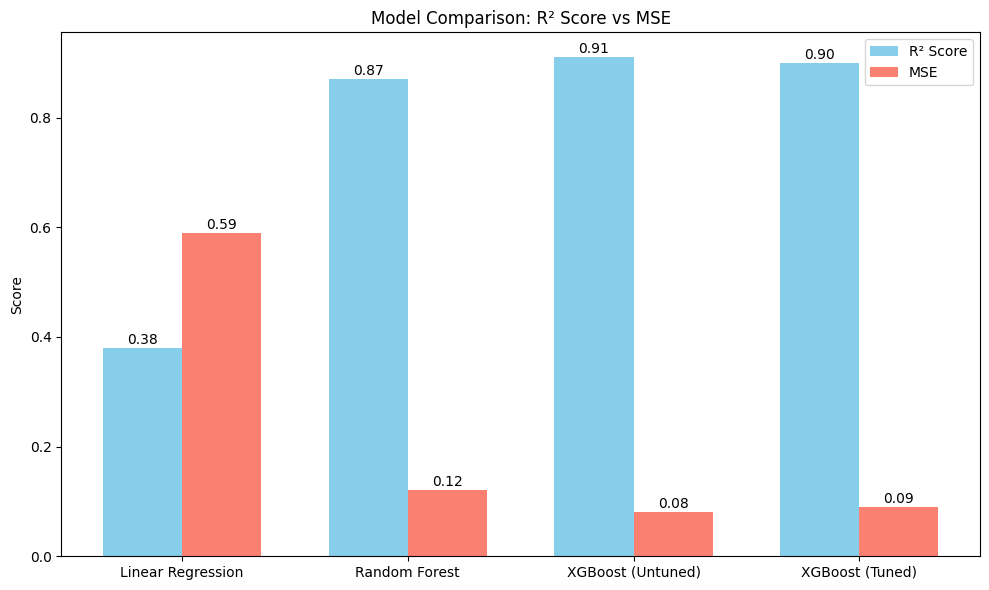

In [46]:
# Model results
model_names = ['Linear Regression', 'Random Forest', 'XGBoost (Untuned)', 'XGBoost (Tuned)']
r2_scores = [0.38, 0.87, 0.91, 0.90]
mse_scores = [0.59, 0.12, 0.08, 0.09]

# Label positions
x = np.arange(len(model_names))
width = 0.35

# Create subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot R² and MSE side by side
bars1 = ax1.bar(x - width/2, r2_scores, width, label='R² Score', color='skyblue')
bars2 = ax1.bar(x + width/2, mse_scores, width, label='MSE', color='salmon')

# Add labels
ax1.set_ylabel('Score')
ax1.set_title('Model Comparison: R² Score vs MSE')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.legend()

# Add values on top of bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [47]:
validation_df = df.sample(n=10, random_state=42)


In [48]:
validation_df.to_excel('/content/drive/MyDrive/validation_data.xlsx', index=False)


In [49]:
df_remaining = df.drop(validation_df.index)


In [50]:
x = df_remaining.drop('Yield', axis=1)
y = df_remaining['Yield']


In [51]:
val_df = pd.read_excel('/content/drive/MyDrive/validation_data.xlsx')
val_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Annual_Rainfall,fertilizers,pesticides_tonnes,Yield
0,19,168,1997,1,0,17301,22730,2500.529722,100.0,1,1.313797
1,14,116,2001,3,0,3067,8904,2608.566168,115.0,1,2.903163
2,22,362,2014,5,0,93000,165000,1966.183034,90.0,1,1.774194
3,30,519,2004,1,0,69819,112400,1095.084839,140.0,1,1.609877
4,14,456,2011,1,0,105525,346950,2875.923050,115.0,1,3.287846
5,25,88,2000,1,0,33,31,508.393690,40.5,1,0.939394
6,9,427,2010,3,0,500,1400,421.283499,100.0,1,2.800000
7,17,229,2000,1,0,14700,8900,910.389015,110.0,1,0.605442
8,30,179,2012,1,0,99791,253569,782.015014,140.0,1,2.541001
9,32,231,1999,0,0,8627,17830,1210.093318,130.0,1,2.066767


In [52]:
val_df['Production'].fillna(df['Production'].mean(), inplace=True)
val_df['Yield'].fillna(df['Yield'].median(), inplace=True)


<ipython-input-52-ad75ab35b5c8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  val_df['Production'].fillna(df['Production'].mean(), inplace=True)
<ipython-input-52-ad75ab35b5c8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [53]:
for col in val_df.select_dtypes(include=['object']).columns:
    val_df[col] = label_encoders[col].transform(val_df[col])


In [54]:
X_val = val_df.drop('Yield', axis=1)
y_val = val_df['Yield']


In [55]:
X_val = sc.transform(X_val)


In [70]:
y_val_pred = lrr.predict(X_val)
print("Linear Regression (Excel Validation Data)")
print("MSE:", mean_squared_error(y_val, y_val_pred))
print("R²:", r2_score(y_val, y_val_pred))


Linear Regression (Excel Validation Data)
MSE: 0.37643863319450965
R²: 0.473704823284553


In [57]:
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [58]:
y_val_pred = rf.predict(X_val)
print("Random Forest (Excel Validation Data)")
print("MSE:", mean_squared_error(y_val, y_val_pred))
print("R²:", r2_score(y_val, y_val_pred))


Random Forest (Excel Validation Data)
MSE: 0.015691678142885933
R²: 0.9780616180356153


In [59]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [60]:
y_val_pred = xgb_model.predict(X_val)
print("XGBoost (Excel Validation Data)")
print("MSE:", mean_squared_error(y_val, y_val_pred))
print("R²:", r2_score(y_val, y_val_pred))


XGBoost (Excel Validation Data)
MSE: 0.009817296004943462
R²: 0.9862745343326124


In [61]:
# This is your best estimator (already trained during tuning)
xgb_tuned_model = randomcv.best_estimator_


In [71]:
y_val_pred = xgb_tuned_model.predict(X_val)

print("Tuned XGBoost (Excel Validation Data)")
print("MSE:", mean_squared_error(y_val, y_val_pred))
print("R²:", r2_score(y_val, y_val_pred))


Tuned XGBoost (Excel Validation Data)
MSE: 0.013800611541812691
R²: 0.9807054997821475


In [65]:
# Example for Linear Regression (validation data)
from sklearn.metrics import mean_squared_error, r2_score

y_val_pred_lr = lrr.predict(X_val)  # X_val: validation features
mse_lr_val = mean_squared_error(y_val, y_val_pred)  # y_val: validation true targets
r2_lr_val = r2_score(y_val, y_val_pred_lr)

# Similarly for Random Forest
y_val_pred_rf = rf.predict(X_val)
mse_rf_val = mean_squared_error(y_val, y_val_pred_rf)
r2_rf_val = r2_score(y_val, y_val_pred_rf)

# For XGBoost untuned
y_val_pred_xgb = xgb_model.predict(X_val)
mse_xgb_val = mean_squared_error(y_val, y_val_pred_xgb)
r2_xgb_val = r2_score(y_val, y_val_pred_xgb)

# For tuned XGBoost
y_val_pred_xgb_tuned = xgb_tuned_model.predict(X_val)
mse_xgb_tuned_val = mean_squared_error(y_val, y_val_pred_xgb_tuned)
r2_xgb_tuned_val = r2_score(y_val, y_val_pred_xgb_tuned)


In [66]:
results_val = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Tuned XGBoost'],
    'R2 Score': [r2_lr_val, r2_rf_val, r2_xgb_val, r2_xgb_tuned_val],
    'MSE': [mse_lr_val, mse_rf_val, mse_xgb_val, mse_xgb_tuned_val]
}


In [67]:
print("Validation Results:")
print(f"Linear Regression - MSE: {mse_lr_val:.4f}, R²: {r2_lr_val:.4f}")
print(f"Random Forest - MSE: {mse_rf_val:.4f}, R²: {r2_rf_val:.4f}")
print(f"XGBoost (Untuned) - MSE: {mse_xgb_val:.4f}, R²: {r2_xgb_val:.4f}")
print(f"XGBoost (Tuned) - MSE: {mse_xgb_tuned_val:.4f}, R²: {r2_xgb_tuned_val:.4f}")


Validation Results:
Linear Regression - MSE: 0.0138, R²: 0.4737
Random Forest - MSE: 0.0157, R²: 0.9781
XGBoost (Untuned) - MSE: 0.0098, R²: 0.9863
XGBoost (Tuned) - MSE: 0.0138, R²: 0.9807


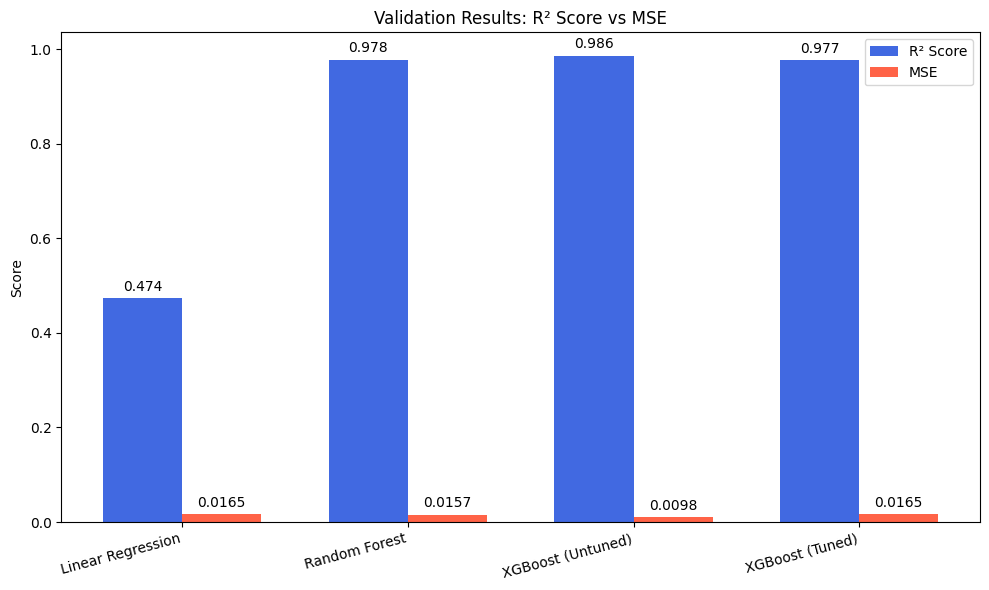

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Linear Regression', 'Random Forest', 'XGBoost (Untuned)', 'XGBoost (Tuned)']
mse_scores = [0.0165, 0.0157, 0.0098, 0.0165]
r2_scores = [0.4737, 0.9781, 0.9863, 0.9770]

x = np.arange(len(models))
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, r2_scores, width, label='R² Score', color='royalblue')
bars2 = ax.bar(x + width/2, mse_scores, width, label='MSE', color='tomato')

# Labels and title
ax.set_ylabel('Score')
ax.set_title('Validation Results: R² Score vs MSE')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, ha='right')
ax.legend()

# Add value labels on top of the bars
def add_labels(bars, fmt):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(fmt.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels(bars1, '{:.3f}')
add_labels(bars2, '{:.4f}')

plt.tight_layout()
plt.show()


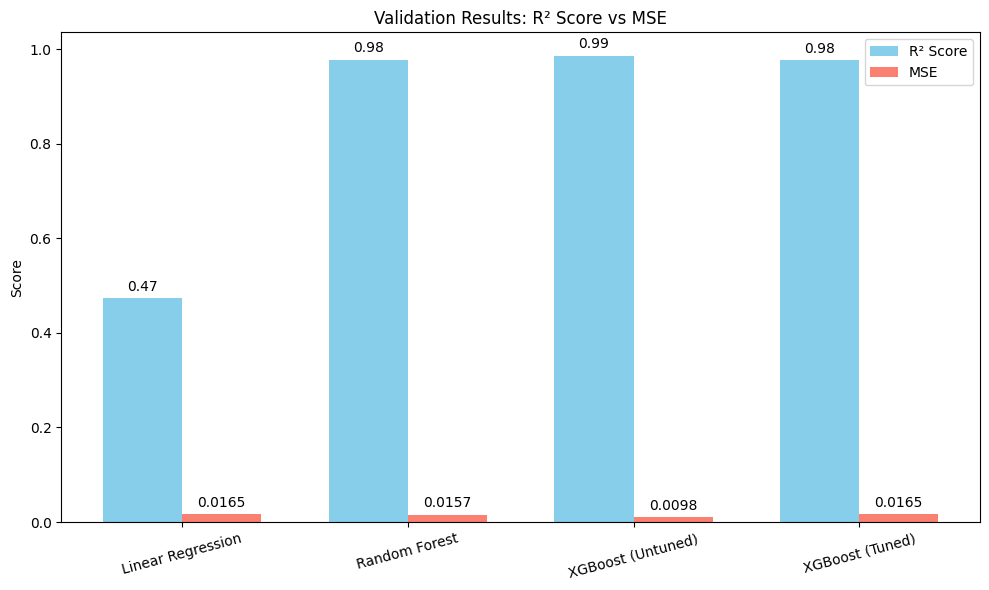

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Validation data
models = ['Linear Regression', 'Random Forest', 'XGBoost (Untuned)', 'XGBoost (Tuned)']
r2_scores = [0.4737, 0.9781, 0.9863, 0.9770]
mse_scores = [0.0165, 0.0157, 0.0098, 0.0165]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
bar1 = ax.bar(x - width/2, r2_scores, width, label='R² Score', color='skyblue')
bar2 = ax.bar(x + width/2, mse_scores, width, label='MSE', color='salmon')

# Labels and Title
ax.set_ylabel('Score')
ax.set_title('Validation Results: R² Score vs MSE')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.legend()

# Add value labels on top of bars
def label_bars(bars, fmt):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(fmt.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

label_bars(bar1, '{:.2f}')
label_bars(bar2, '{:.4f}')

plt.tight_layout()
plt.show()
